# Introduction

This jupyter notebook reproduces the main figures (the three figures with the rates) from the review by Mandel & Broekgaarden (2021) on "Rates of Compact Object Coalescence". In order to reproduce the figures one needs to download the data that is available on https://zenodo.org/record/5072401 doi: [![DOI](https://zenodo.org/badge/DOI/10.5281/zenodo.5072401.svg)](https://doi.org/10.5281/zenodo.5072401) !Make sure to use the latest version of the dataset!

To make the figures from the paper, put all the data (at least 26 files, unless you are only interested in reproducing one of the Compact Object flavors) in one directory that we will refer to in the remaining jupyter notebook as the *path_to_data_directory*. Enter the path to the directory below, and run the jupyter notebook cells. 




### Reference
If you use this data/code for publication, please cite both the paper: Mandel & Broekgaarden (2021) and the dataset on Zenodo through it's doi https://zenodo.org/record/5072401 doi: [![DOI](https://zenodo.org/badge/DOI/10.5281/zenodo.5072401.svg)](https://doi.org/10.5281/zenodo.5072401)



For any questions or inquiry, please email one of or both the authors: 
Ilya Mandel: ilya.mandel@monash.edu 
Floor Broekgaarden: floor.broekgaarden@cfa.harvard.edu

In [1]:
# full path to the directory with all data files   
# change this to your path with the data directory
path_to_data_directory = '/Users/floorbroekgaarden/Projects/GitHub/Rates_of_Compact_Object_Coalescence/Data_Mandel_and_Broekgaarden_2021/'



In [2]:
# the following lines import the `default_scripts` files that contains some global code / settings that are used throughout this jupyter notebook
# if for some reason the python script is not working, or not importing, one can copy paste the code in the script and run it in a cell above/below this block 
# Not all codes / libraries loaded are strictly needed. 

import sys
sys.path.append('.') 
from default_scripts import * 

# just to make the cells appear wider: comment these lines if needed. 
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))



## Rates on 1 big axis

In [7]:


def plotDCOrates(axe, df_names, df_colordict, df_labels, DCOtype='BHNS', ordered=None):
    """    
    
    axe: axe to plot the figure on 
    df_names: names of the textfiles with the data  
    df_colordict: color map for the data files 
    df_labels: map to the label names of the data files  
    DCOtype: Double Compact object type, options are 'BHNS', 'BHBH' or 'NSNS'  
    ordered: way to order the different studies within a sub group. 
    Ordered Options are 'year', 'code' (based on code names) and 'max' (based on maximum rates; under construction)
    
    
    """    

    

    

    v_height=0
    for ind_file, csv_filename in enumerate(df_names):
        
        v_height_top = int(v_height) +.5

        
        medians_list = [] # list where we will save the medians of each rate estimate

        
        df = pd.read_csv(csv_filename, header=0, skiprows=[0,1,2,3,4,6,7,8])
        df = df.iloc[:,1::2]
        
        # plotting style 
        df_ps = pd.read_csv(csv_filename, header=0, skiprows=[0,1,2,3,4,6,8])
        df_ps = df_ps.iloc[:,1::2]

        rate_max_list = []
        codes_list = []
        
        df_codes = pd.read_csv(csv_filename, header=0, skiprows=[0,1,2,3,4,7,8])
        df_codes = df_codes.iloc[:,1::2]
        
        labelname = df_labels[ind_file]
        
        rate_max_list = []
        plot_styles   = []
        
        if ordered=='max':
            for ind_n, name in enumerate(df.columns):
                rate = df[name]
                mask_notna = (df[name].notna())
                rate = rate[mask_notna]

                rate_max_list.append(np.max(rate))
            
            sorted_ind = np.argsort(np.asarray(rate_max_list))
        
            colum_list = df.columns[sorted_ind]
        
        
        elif ordered=='code':
            for ind_n, name in enumerate(df.columns):
                rate = df[name]
                mask_notna = (df[name].notna())
                rate = rate[mask_notna]

                rate_max_list.append(np.max(rate))
                code = df_codes[name][0]
                codes_list.append(code)
            
            sorted_ind = np.argsort(np.asarray(codes_list))
            colum_list = df.columns[sorted_ind]
        
            
            ##
            colum_list_sorted = df.columns[sorted_ind]
            codes_list_sorted = np.asarray(codes_list)[sorted_ind]
            
    
        

        elif ordered=='year':
            colum_list = df.columns
            colum_list_sorted = df.columns
            
        else:
            colum_list = df.columns
            
            
        # obtain ordered:
        
        
        v_height+= -1
        for ind_n, name in enumerate(colum_list):
            
            
            
            rate = df[name]

            mask_notna = (df[name].notna())
            rate = rate[mask_notna]
            

            # read in plotting style 
            ps = df_ps[name][0]
            if ps in range(20):
                plot_using_plotting_style(axe, ps, x_=np.asarray(rate), y_=v_height*np.ones_like(rate), color=df_colordict[labelname])
            else: 
                plot_using_plotting_style(axe, ps=3, x_=np.asarray(rate), y_=v_height*np.ones_like(rate), color=df_colordict[labelname])

            medians_list.append(np.median(rate))


            ## ADD LABELS to the left of the measurements 
            if (min(rate)>2*1E-2) & (min(rate)<=1E5):
                axe.text(min(rate)/1.25, v_height, s=colum_list_sorted[ind_n], ha='right', va='center', fontsize=fs-5)
            elif (min(rate)>1E5):
                axe.text(1E5/1.5, v_height, s=colum_list_sorted[ind_n], ha='right', va='center', fontsize=fs-5)   
            # plot on the right side 
            elif (min(rate)<=2*1E-2) :
                axe.text(max(rate)*1.25, v_height, s=colum_list_sorted[ind_n], ha='left', va='center', fontsize=fs-5)

                
            switchLabelLeft=False
            # if plotting the first rate, add in text which type of formation channel we are plotting 
            if ind_n==(0): #len(df.columns)-1
                dict_name = df_labels[ind_file]
                # plot the following ones as exception somewhere else:
                if ((DCOtype=='BHNS') & (dict_name=='isolated binaries')) | ((DCOtype=='NSNS') & (dict_name=='isolated binaries')):
                    switchLabelLeft = True
                elif (DCOtype=='NSNS') & (dict_name=='sGRBs') | (DCOtype=='NSNS') & (dict_name=='kilonovae') | (DCOtype=='NSNS') & (dict_name=='pulsars'):
                    switchLabelLeft = True 
                    
                if switchLabelLeft==True:
                    axe.text(2*1E-3, v_height+0.3, s=r'\textbf{%s}'%names_label_dict[dict_name] , rotation = 0, fontsize = fs+2, color=df_colordict[labelname], ha = 'left', va='center', weight = 'bold')
                else:
                    axe.text(8*1E4,  v_height+0.3, s=r'\textbf{%s}'%names_label_dict[dict_name] , rotation = 0, fontsize = fs+2, color=df_colordict[labelname], ha = 'right', va='center', weight = 'bold')

            v_height+= -1  # height of rate to plot on vertical axes  


            
        v_height+= -1

        v_height_bottom = int(v_height)+0.5

        
        if ind_file!=(len(df_names)-1):   
            axe.plot([1E-3, 1E5],  [v_height+0.5]*2, lw=1.5, c='gray', ls=':', zorder=0)
    
#         # add bar with median values of the medians from this channel/list 
#         super_median = np.median(medians_list)
#         axe.fill_between(x=[super_median/1.5, super_median*1.5], y1=[v_height_bottom]*2, y2=[v_height_top]*2, color=df_colordict[labelname], alpha=0.2, zorder=1)
        

    return 





def make_figure(DCOtype='BHNS', ordered='max'):
    
    
    ncols, nrows=1,1
    
    # all data files are structured (in path / file name ) to start with the following
    DCOdirectoryPath = path_to_data_directory + dictDCOdirectory[DCOtype]+'_rates_'
    
    if DCOtype in ['BHBH']:
        s_text = r'Local merging BH-BH rate' 
        
        names =   [DCOdirectoryPath+'observations-GWs.csv',\
                   DCOdirectoryPath+'isolated-binary-evolution.csv', DCOdirectoryPath+'CHE.csv',
                   DCOdirectoryPath+'population-III.csv',DCOdirectoryPath+'triples.csv',\
                   DCOdirectoryPath+'globular-clusters.csv',\
                  DCOdirectoryPath+'nuclear-clusters.csv', DCOdirectoryPath+'young-stellar-clusters.csv', 
                    DCOdirectoryPath+'primordial.csv']
        rate_labels = ['GWs','isolated binaries', 'CHE', 'pop-III', 'triples','dynamical: GC', 'dynamical: NC',  'dynamical: YSC',    'primordial']
        d1_, d2_ = 20,28
       

        
    elif DCOtype=='BHNS': 
        s_text = r'Local merging NS-BH rate' 
        
        names =   [DCOdirectoryPath+'observations-GWs.csv',\
                   DCOdirectoryPath+'isolated-binary-evolution.csv', DCOdirectoryPath+'CHE.csv',
                   DCOdirectoryPath+'population-III.csv', DCOdirectoryPath+'triples.csv',\
                   DCOdirectoryPath+'globular-clusters.csv',\
                  DCOdirectoryPath+'nuclear-clusters.csv', DCOdirectoryPath+'young-stellar-clusters.csv'\
                   ]
        rate_labels = ['GWs','isolated binaries', 'CHE', 'pop-III',  'triples' , 'dynamical: GC', 'dynamical: NC',  'dynamical: YSC']
        d1_ = 20 
        d2_ = 22*(55/99) +6

    elif DCOtype=='NSNS':
        
        s_text = r'Local merging NS-NS rate'
        
        names = [DCOdirectoryPath+'observations-GWs.csv', DCOdirectoryPath+'observations-sGRBs.csv',\
                 DCOdirectoryPath+'observations-kilonovae.csv' ,\
                  DCOdirectoryPath+'observations-pulsars.csv',\
                 DCOdirectoryPath+'isolated-binary-evolution.csv', DCOdirectoryPath+'triples.csv',\
                 DCOdirectoryPath+'globular-clusters.csv',\
                   DCOdirectoryPath+'nuclear-clusters.csv', DCOdirectoryPath+'young-stellar-clusters.csv'\
                  ] 
        
        rate_labels = ['GWs', 'sGRBs', 'kilonovae', 'pulsars', \
                       'isolated binaries',  'triples',   'dynamical: GC', 'dynamical: NC',  'dynamical: YSC'] 
        
        # size of figure
        d1_ = 20
        d2_ = 22*(70/99) +6
    
    d1, d2 = d1_, d2_
    f, axe= plt.subplots(ncols=ncols,nrows=nrows,figsize=(d1,d2), gridspec_kw={"width_ratios":[1], "height_ratios":[1]})     
    
    
    text_DCO = r'\textbf{%s}'%DCOtype + '\n' + r'\textbf{merger rates}'
    textbox_props = dict(boxstyle='round', facecolor='gray', alpha=0.1)
    
    
    
        
    plotDCOrates(axe=axe, df_names=names, df_colordict=name_colors, df_labels=rate_labels, DCOtype=DCOtype, ordered=ordered)
    make_up_axes(axe, DCOtype, df_names=names,ordered=ordered)
    
    draw_vlines(axe=axe, v_values=[1E-4, 1E-3, 1E-2, 1E-1, 1E0, 1E1, 1E2, 1E3, 1E4, 1E5])
    
    
    plt.title(s_text, fontsize=34,  pad=20)
        
    plt.tight_layout()
    plt.subplots_adjust(wspace=0, hspace=0)#2)
    plt.savefig('./Rates_' +DCOtype + '_' + ordered + 'sorted_colors.png', dpi=300, transparent=False)#,\
    plt.savefig('./Rates_' +DCOtype + '_' + ordered + 'sorted_colors.pdf')#,\
#                bbox_extra_artists=(lgd,), bbox_inches='tight')
    plt.show()

    plt.close()    
    
    
    
    
    

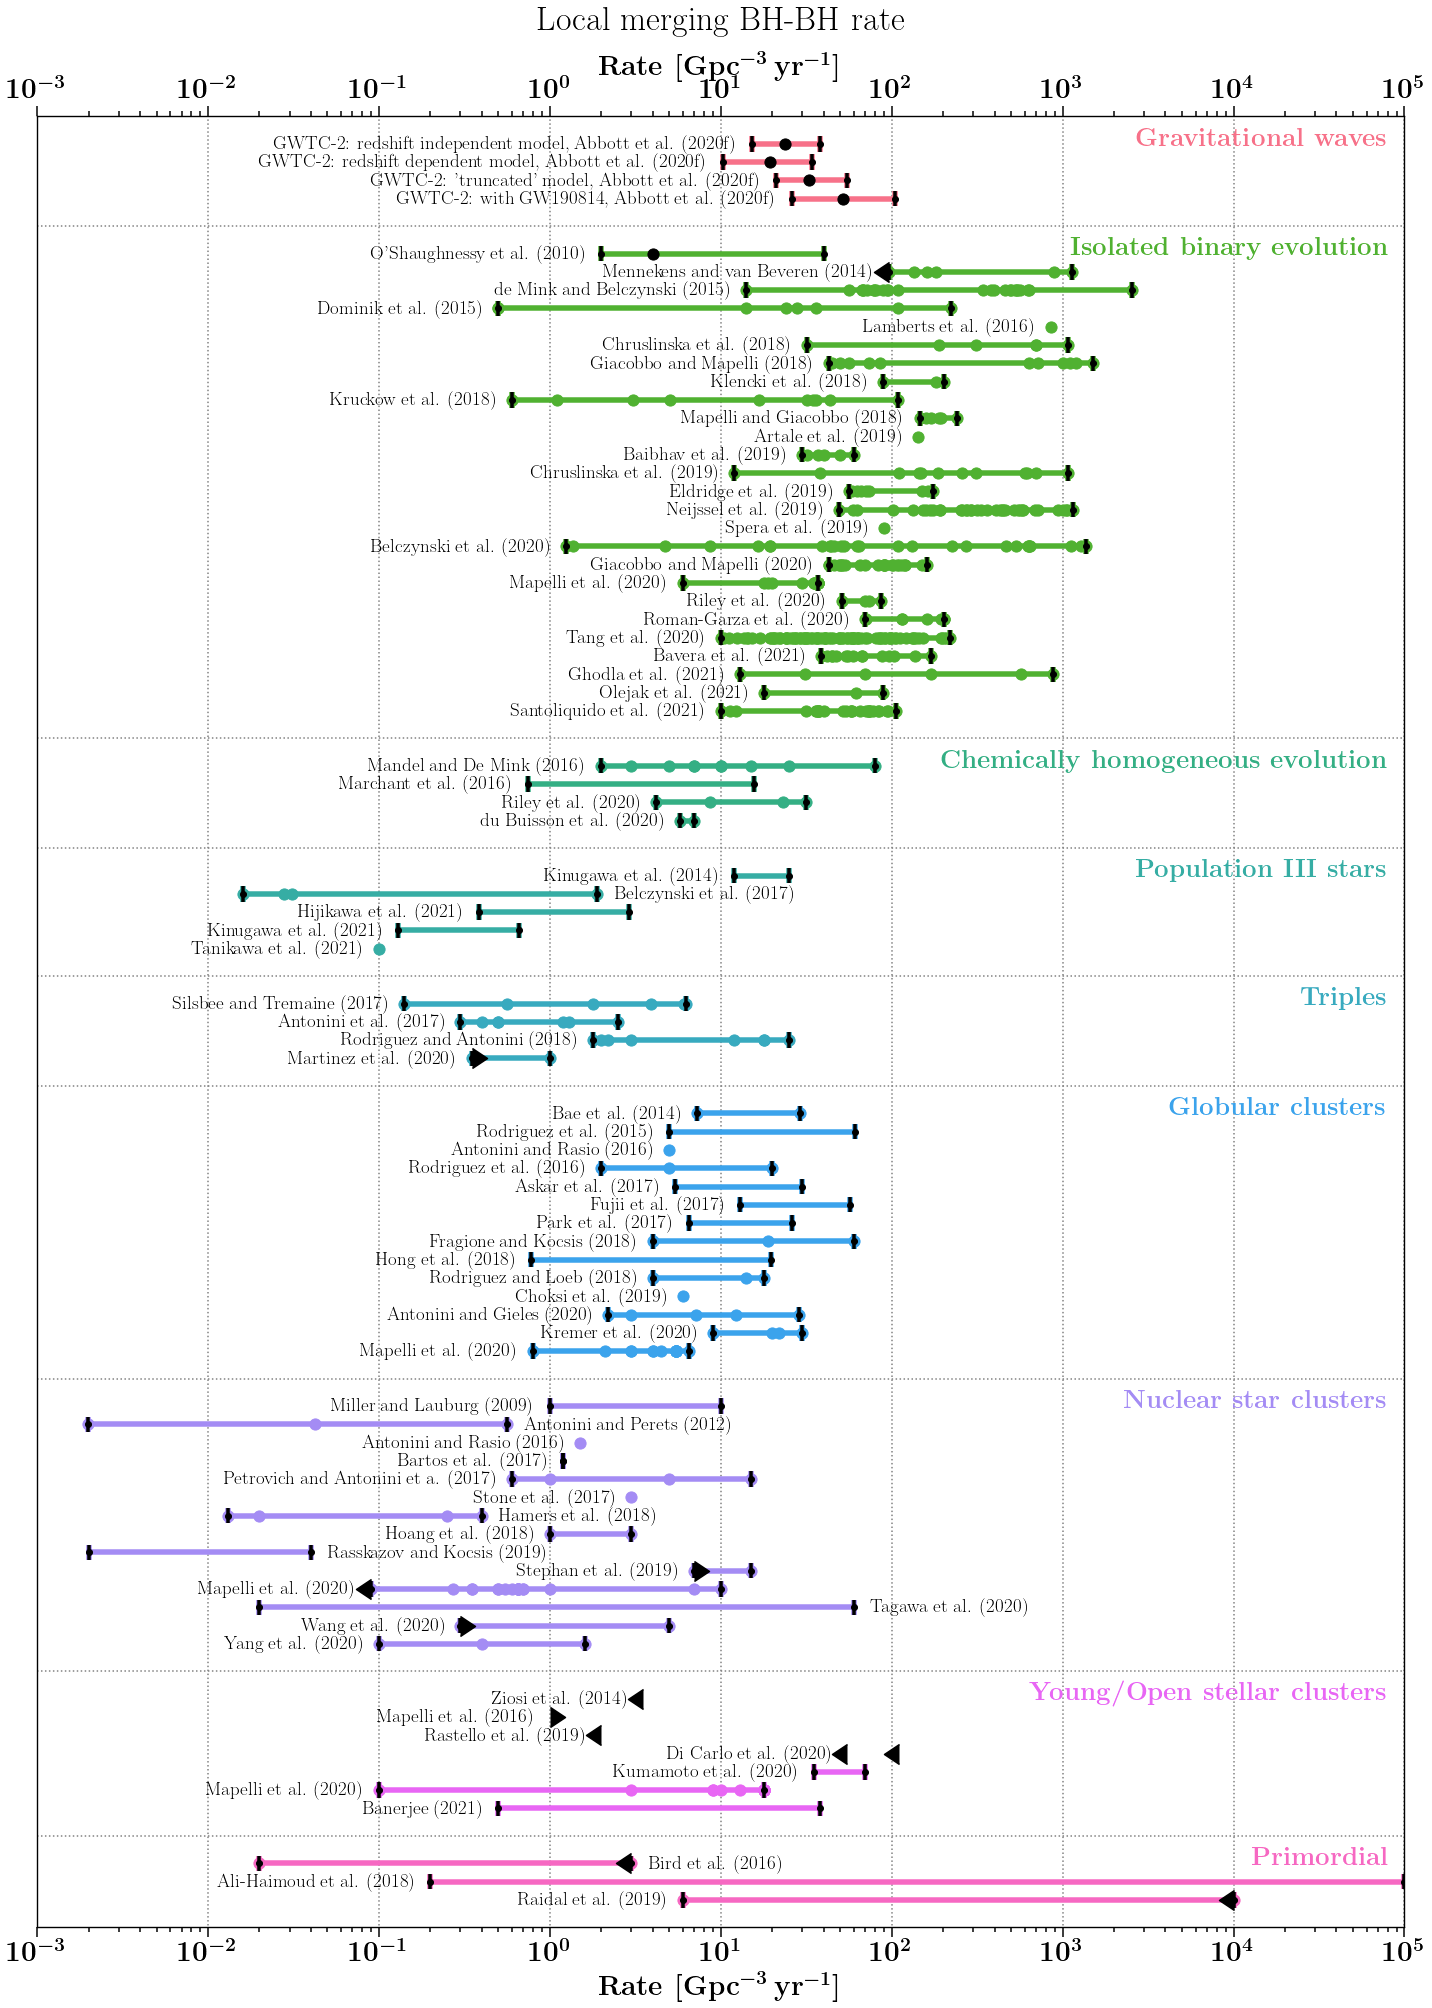

In [8]:
make_figure(DCOtype='BHBH', ordered='year')

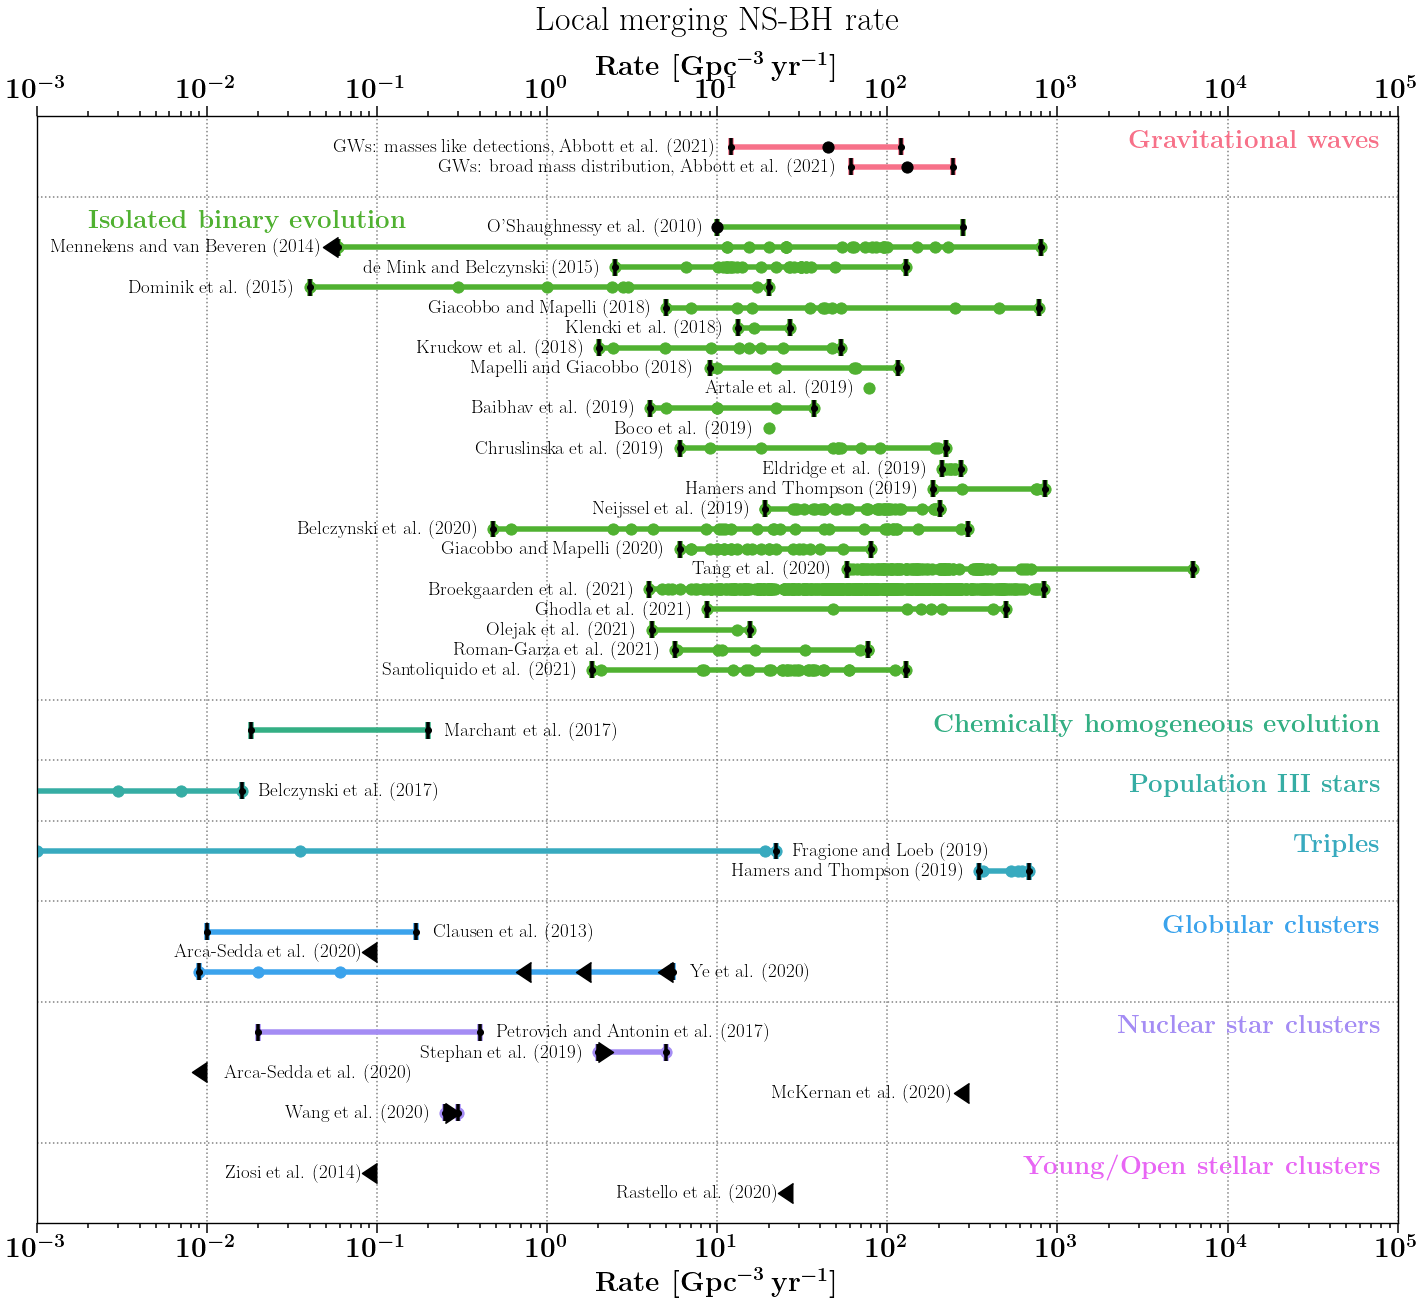

In [9]:
make_figure(DCOtype='BHNS', ordered='year')

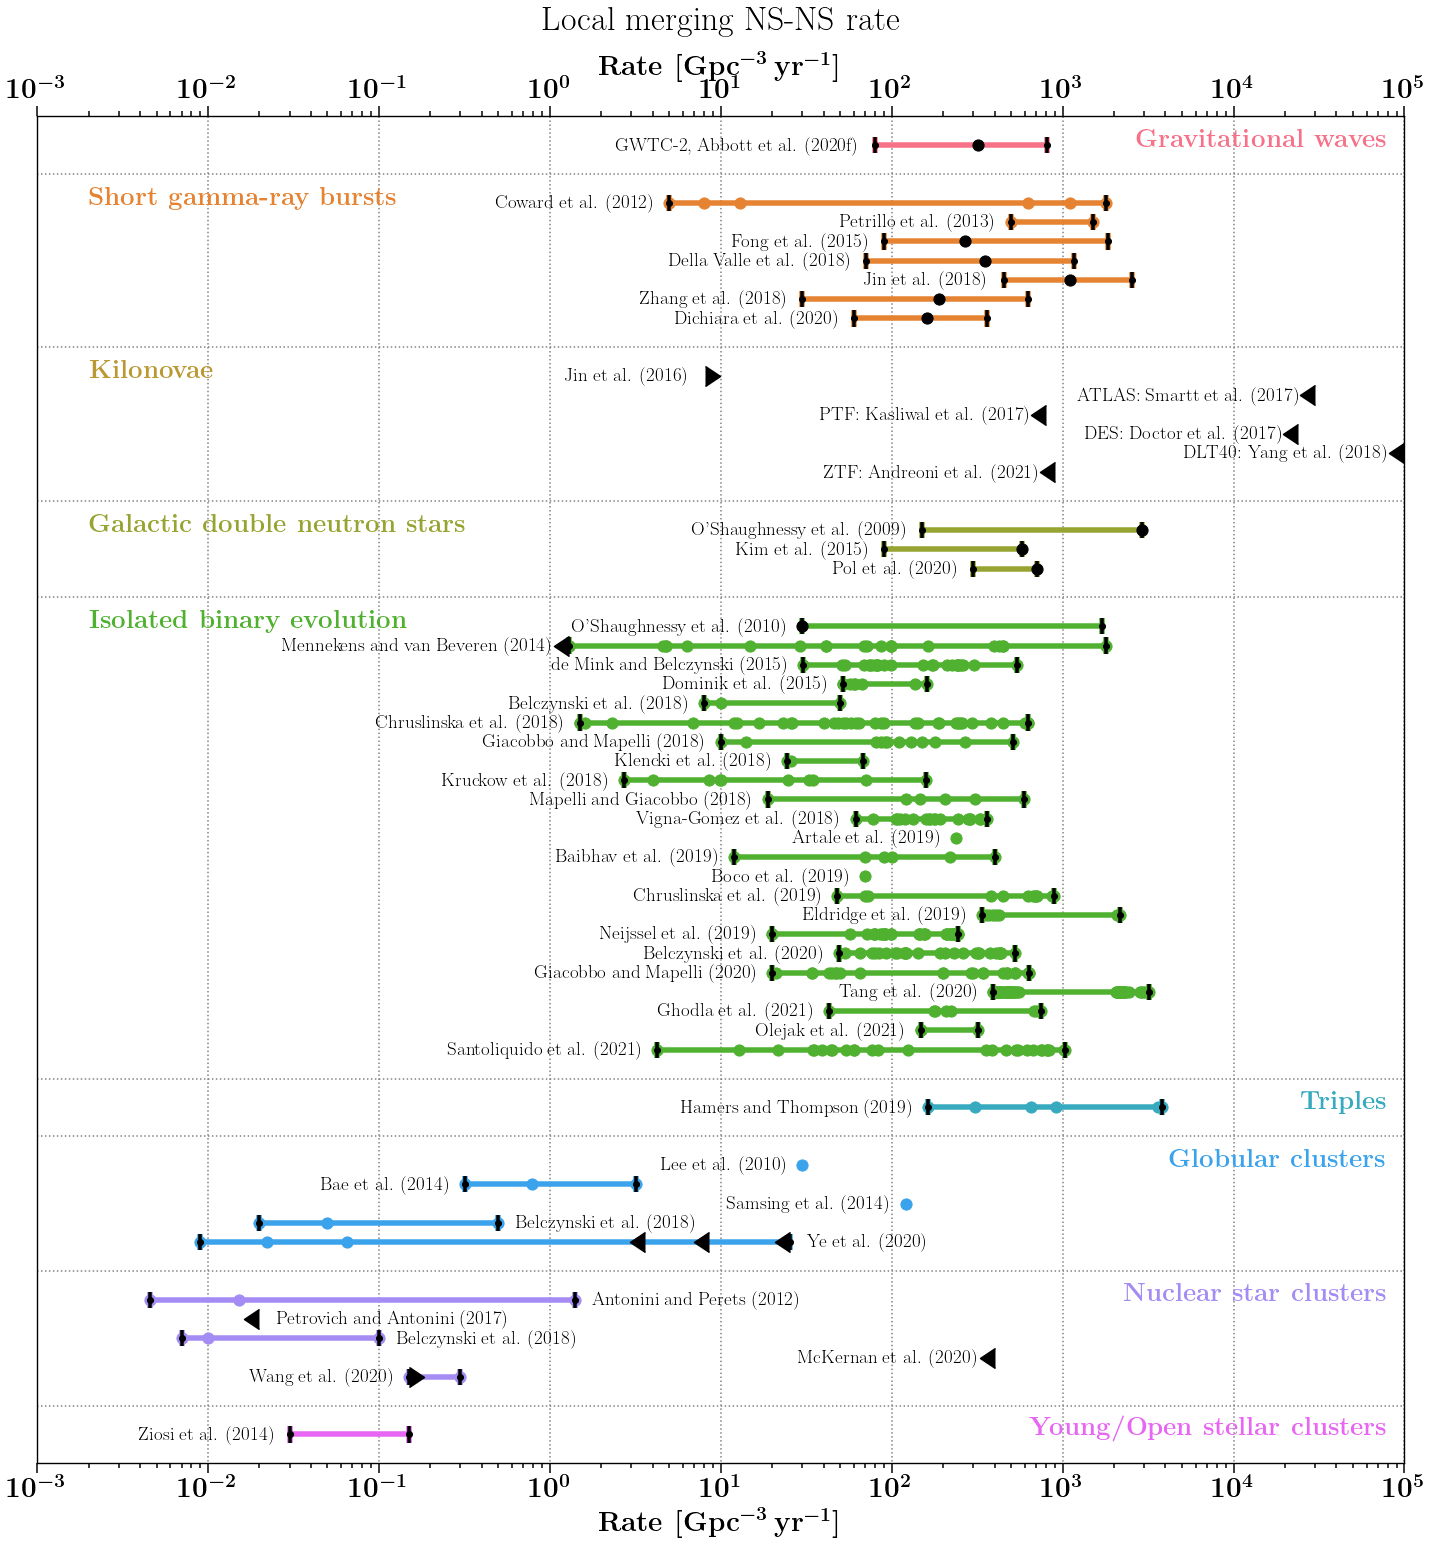

In [10]:
make_figure(DCOtype='NSNS',ordered='year')